In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

In [3]:
df = pd.read_csv('Copy of Chicago_Crime_Detective.csv')
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
5,5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012
6,6,8950760,12/31/12 20:10,STREET,False,False,423,4,48,2012
7,7,8951611,12/31/12 20:00,STREET,False,False,231,2,40,2012
8,8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012
9,9,8950706,12/31/12 18:00,STREET,False,False,1215,12,24,2012


In [4]:
df.tail()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001
191640,191640,1310463,1/1/01 0:01,STREET,False,False,1911,NaN,NaN,2001


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'LocationDescription', 'Arrest', 'Domestic',
       'Beat', 'District', 'CommunityArea', 'Year'],
      dtype='object')

In [0]:
df.drop(df.columns[0], axis=1, inplace=True)

In [7]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [8]:
df.describe()

,ID,Beat,Year
count,1.916410e+05,191641.000000,191641.000000
mean,4.968629e+06,1258.810771,2006.134940
std,2.342997e+06,702.530465,3.520285
min,1.310022e+06,111.000000,2001.000000
25%,2.832144e+06,722.000000,2003.000000
50%,4.762956e+06,1121.000000,2006.000000
75%,7.201878e+06,1733.000000,2009.000000
max,9.181151e+06,2535.000000,2012.000000


In [9]:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [0]:
df['Date'] = df['Date'].apply(dateutil.parser.parse, dayfirst=True)

In [12]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [13]:
df.Date.describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

In [14]:
dates = list(df['Date'])
dates.sort()
dates[len(dates)//2]

Timestamp('2006-05-24 22:00:00')

In [0]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [16]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [17]:
df.Month.value_counts()

10    16977
7     16733
12    16417
1     16325
5     16298
8     16288
9     16009
3     15895
6     15894
11    15765
4     15086
2     13954
Name: Month, dtype: int64

In [18]:
df['Weekday'] = df['Date'].dt.day_name()
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,Monday


In [19]:
df['Weekday'].value_counts()

Friday       28545
Saturday     27406
Wednesday    27387
Monday       27372
Tuesday      27141
Thursday     27067
Sunday       26723
Name: Weekday, dtype: int64

In [20]:
df[df['Arrest'] == True].Month.value_counts()

10    1381
12    1358
7     1354
1     1352
3     1295
8     1287
4     1268
11    1265
5     1253
6     1248
9     1247
2     1228
Name: Month, dtype: int64

In [21]:
df.groupby('Year').ID.count()

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: ID, dtype: int64

In [0]:
year_count = df.groupby('Year', as_index=False).agg({"ID": "count"})

In [23]:
year_count

,Year,ID
0,2001,20669
1,2002,18753
2,2003,16657
3,2004,16862
4,2005,16484
5,2006,16098
6,2007,14280
7,2008,14445
8,2009,12167
9,2010,15497


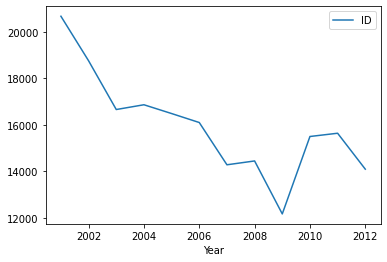

In [24]:
year_count.plot(x ='Year', y='ID', kind = 'line')

In [28]:
df.LocationDescription.value_counts()[:6]

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [29]:
df.head(5)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,Monday


In [44]:
tr = df[df['Arrest'] == True].groupby('Year').ID.count()
tr

Year
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: ID, dtype: int64

In [45]:
fl = df[df['Arrest'] == False].groupby('Year').ID.count()
fl

Year
2001    18517
2002    16638
2003    14859
2004    15169
2005    14956
2006    14796
2007    13068
2008    13425
2009    11327
2010    14796
2011    15012
2012    13542
Name: ID, dtype: int64

In [46]:
tr/(tr+fl)

Year
2001    0.104117
2002    0.112782
2003    0.107943
2004    0.100403
2005    0.092696
2006    0.080880
2007    0.084874
2008    0.070613
2009    0.069039
2010    0.045235
2011    0.039969
2012    0.039029
Name: ID, dtype: float64

In [0]:
locations = ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']
new_loc = df[df['LocationDescription'].isin(locations)]

In [49]:
new_loc.shape

(177510, 11)

In [52]:
df[df['LocationDescription'] =='GAS STATION'].Weekday.value_counts()

Saturday     345
Sunday       318
Friday       316
Wednesday    294
Monday       287
Thursday     282
Tuesday      269
Name: Weekday, dtype: int64